In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/préparation examen/Projet-Amazon sales/Data-Amazon-Sales.csv')
df

# Task
Perform a comprehensive machine learning analysis on the Amazon Sales dataset from `/content/drive/MyDrive/préparation examen/Projet-Amazon sales/Data-Amazon-Sales.csv`.

## Définir la Problématique et l'Objectif

### Subtask:
Définir précisément la problématique (classification binaire/multi-classe, régression, clustering non-supervisé) et l'objectif clair de l'analyse à réaliser.


**Reasoning**:
To define the problem and objective, I need to first inspect the dataset's content, features, and potential target variables. Displaying the head of the DataFrame and its information will help in understanding the data structure and types.



In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**Reasoning**:
The previous attempt to display `df.head()` and `df.info()` failed because the `df` DataFrame was not defined. I need to re-execute the cell that reads the CSV file into `df` before attempting to use `df`.



In [3]:
df=pd.read_csv('/content/drive/MyDrive/préparation examen/Projet-Amazon sales/Data-Amazon-Sales.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**Reasoning**:
To definitively define the machine learning problem and objective, I need to understand the actual data within the columns, especially potential target variables like 'rating' and 'discounted_price', which are currently of 'object' type. Inspecting their unique values will reveal if they contain non-numeric characters, outliers, or are directly convertible to numeric types suitable for regression or classification.



In [5]:
print("Unique values for 'rating':", df['rating'].unique())
print("Unique values for 'discounted_price' (first 10):", df['discounted_price'].unique()[:10])
print("Unique values for 'discount_percentage' (first 10):", df['discount_percentage'].unique()[:10])

Unique values for 'rating': ['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']
Unique values for 'discounted_price' (first 10): ['₹399' '₹199' '₹329' '₹154' '₹149' '₹176.63' '₹229' '₹499' '₹299' '₹219']
Unique values for 'discount_percentage' (first 10): ['64%' '43%' '90%' '53%' '61%' '85%' '65%' '23%' '50%' '33%']


### Subtask: Définir la Problématique et l'Objectif

**Problématique (Machine Learning Problem Type):**

Given the available features in the Amazon Sales dataset, particularly the 'rating' column, a suitable machine learning problem is **Regression**. The goal is to predict a continuous numerical value (the product rating).

**Objectif (Objective of the Analysis):**

The primary objective of this analysis is to **predict the 'rating' a product will receive based on its available characteristics** such as `product_name`, `category`, `discounted_price`, `discount_percentage`, etc. By predicting ratings, businesses can identify factors influencing customer satisfaction, anticipate product performance, and potentially improve product offerings or pricing strategies. This could also be extended to predict `discounted_price` as another regression problem.

## Créer un Dictionnaire de Données

### Subtask:
Décrire les métadonnées du jeu de données : taille, types de variables, signification de chaque feature et identification de la variable cible.


### Data Dictionary for Amazon Sales Dataset

**Dataset Size:**
*   **Number of Rows:** 1465
*   **Number of Columns:** 16

**Target Variable:** 'rating'

This analysis aims to understand and potentially predict product ratings, making 'rating' the primary target variable.

| Feature Name        | Current Type | Description                                                        | Expected Type (after cleaning) | Is Target Variable |
| :------------------ | :----------- | :----------------------------------------------------------------- | :----------------------------- | :----------------- |
| product_id          | object       | Unique identifier for each product.                                | object                         | No                 |
| product_name        | object       | Name of the product.                                               | object                         | No                 |
| category            | object       | Category to which the product belongs.                             | object                         | No                 |
| discounted_price    | object       | Price of the product after discount. (Contains '₹')                | float                          | No                 |
| actual_price        | object       | Original price of the product. (Contains '₹')                      | float                          | No                 |
| discount_percentage | object       | Percentage of discount applied to the product. (Contains '%')      | float                          | No                 |
| rating              | object       | Average rating given to the product. (Contains non-numeric chars)  | float                          | Yes                |
| rating_count        | object       | Total number of ratings received for the product. (Contains ',')   | int                            | No                 |
| about_product       | object       | Brief description of the product.                                  | object                         | No                 |
| user_id             | object       | Unique identifier for the user who reviewed the product.           | object                         | No                 |
| user_name           | object       | Name of the user who reviewed the product.                         | object                         | No                 |
| review_id           | object       | Unique identifier for each review.                                 | object                         | No                 |
| review_title        | object       | Title of the product review.                                       | object                         | No                 |
| review_content      | object       | Full text content of the product review.                           | object                         | No                 |
| img_link            | object       | URL link to the product image.                                     | object                         | No                 |
| product_link        | object       | URL link to the product page on Amazon.                            | object                         | No                 |

## Pré-traitement des Données

### Subtask:
Effectuer le nettoyage des données (gestion des doublons, formatage), l'imputation des valeurs manquantes en utilisant des stratégies avancées, l'encodage des variables catégorielles (One-Hot, Label Encoding, Target Encoding) et la normalisation ou standardisation des données numériques.


**Reasoning**:
The first instruction is to clean the 'discounted_price' and 'actual_price' columns by removing currency symbols and commas, then converting them to a floating-point numeric type. This prepares these columns for numerical analysis.



In [6]:
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
print("Cleaned 'discounted_price' and 'actual_price' columns.")

Cleaned 'discounted_price' and 'actual_price' columns.


**Reasoning**:
Next, I will clean the 'discount_percentage' column by removing the percentage symbol '%' and converting the column to a floating-point numeric type, as per the instructions.



In [7]:
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False).astype(float)
print("Cleaned 'discount_percentage' column.")

Cleaned 'discount_percentage' column.


**Reasoning**:
Now, I will clean the 'rating' column by replacing non-numeric characters with `np.nan` and then converting it to a float type, as specified in the instructions.



In [8]:
df['rating'] = df['rating'].replace('[^0-9.]', np.nan, regex=True).astype(float)
print("Cleaned 'rating' column.")

Cleaned 'rating' column.


**Reasoning**:
Next, I will clean the 'rating_count' column by removing comma delimiters, handling potential non-numeric values by replacing them with `np.nan`, and then converting it to a numeric type, as specified in the instructions.



In [9]:
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').astype('Int64')
print("Cleaned 'rating_count' column.")

Cleaned 'rating_count' column.


**Reasoning**:
Now, I will impute missing values in the 'rating' and 'rating_count' columns by replacing any `np.nan` values with the median value of their respective columns, as specified in the instructions. This will ensure that these columns are fully numeric for further analysis.



In [10]:
median_rating = df['rating'].median()
median_rating_count = df['rating_count'].median()

df['rating'].fillna(median_rating, inplace=True);
df['rating_count'].fillna(median_rating_count, inplace=True);

print(f"Imputed missing values in 'rating' with median: {median_rating}")
print(f"Imputed missing values in 'rating_count' with median: {median_rating_count}")

Imputed missing values in 'rating' with median: 4.1
Imputed missing values in 'rating_count' with median: 5179.0


**Reasoning**:
Now, I will remove duplicate rows from the DataFrame, as per the instructions, to ensure data uniqueness and avoid biases in analysis.



In [11]:
initial_rows = len(df)
df.drop_duplicates(inplace=True)
removed_rows = initial_rows - len(df)
print(f"Removed {removed_rows} duplicate rows.")

Removed 0 duplicate rows.


**Reasoning**:
To verify the data cleaning and type conversions, I will display the DataFrame's information using `df.info()` and the first few rows using `df.head()` to confirm that the columns have the correct data types and that missing values have been handled, as per the instructions.



In [12]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   Int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Analyse Exploratoire des Données (EDA)

### Subtask:
Réaliser une analyse exploratoire des données incluant la visualisation des distributions (histogrammes, boxplots), l'analyse des corrélations (Heatmap) et le Feature Engineering pour la création de nouvelles variables pertinentes. Chaque graphique sera présenté de manière claire et interprété par un commentaire textuel.


**Reasoning**:
The first step in EDA is to visualize the distributions of numerical features. I will generate histograms for 'discounted_price', 'actual_price', 'discount_percentage', 'rating', and 'rating_count' to understand their spread and central tendency. I will use `matplotlib` for plotting.



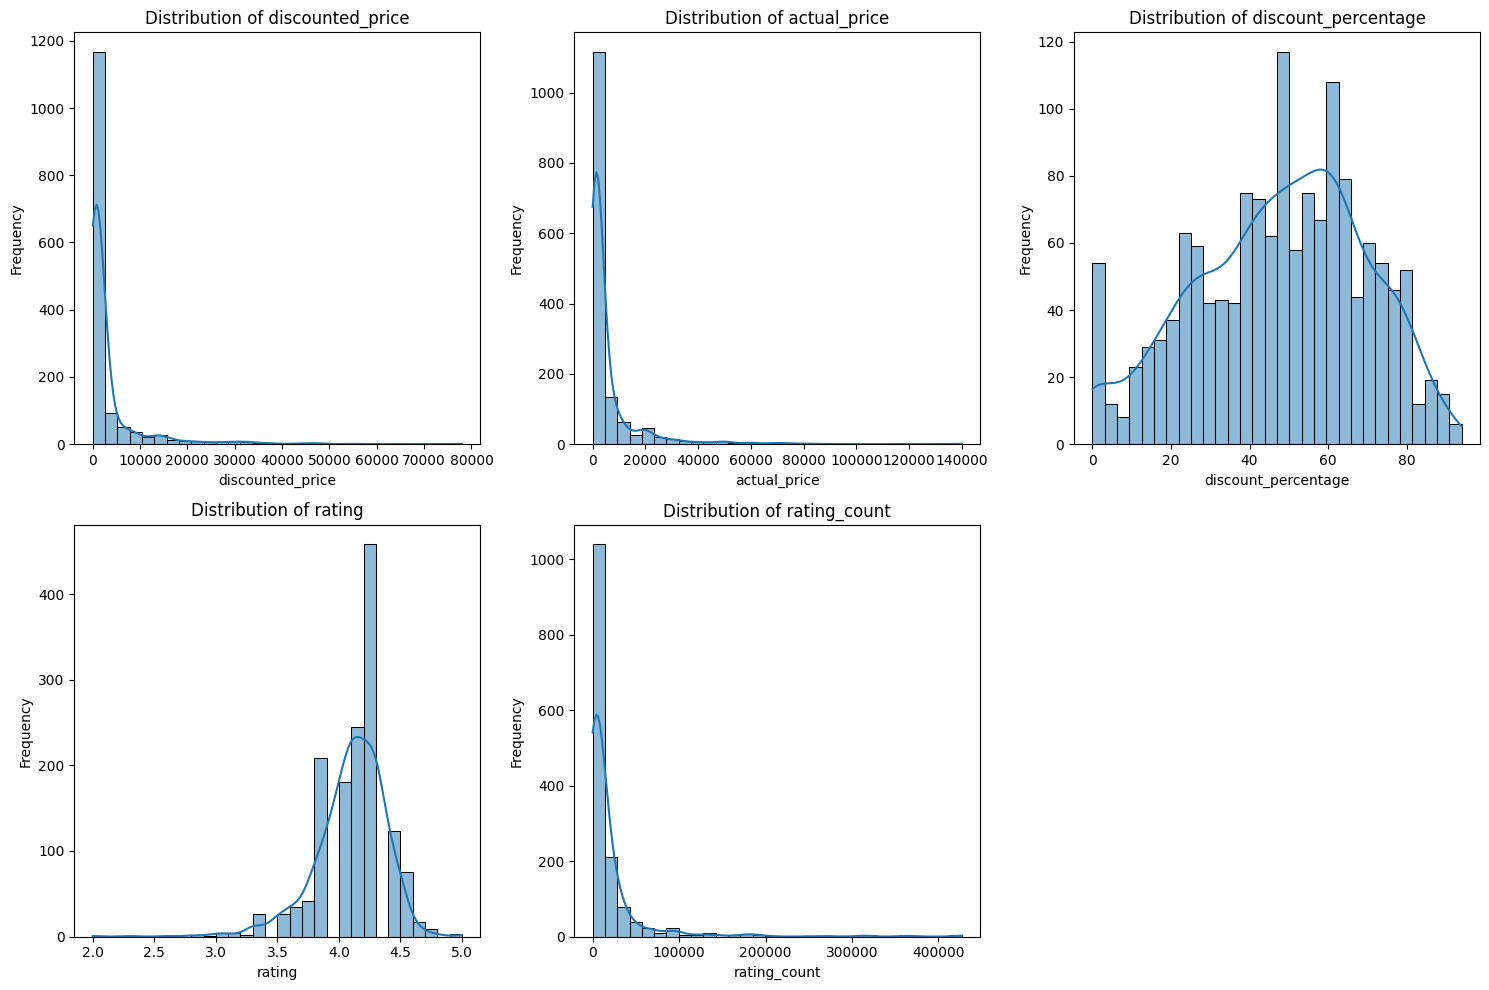

Histograms generated for numerical columns.


In [35]:
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms generated for numerical columns.")

**Reasoning**:
Following the generation of histograms, I will now create box plots for the same numerical columns ('discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count') to visually identify potential outliers and further understand the spread of the data, as instructed.



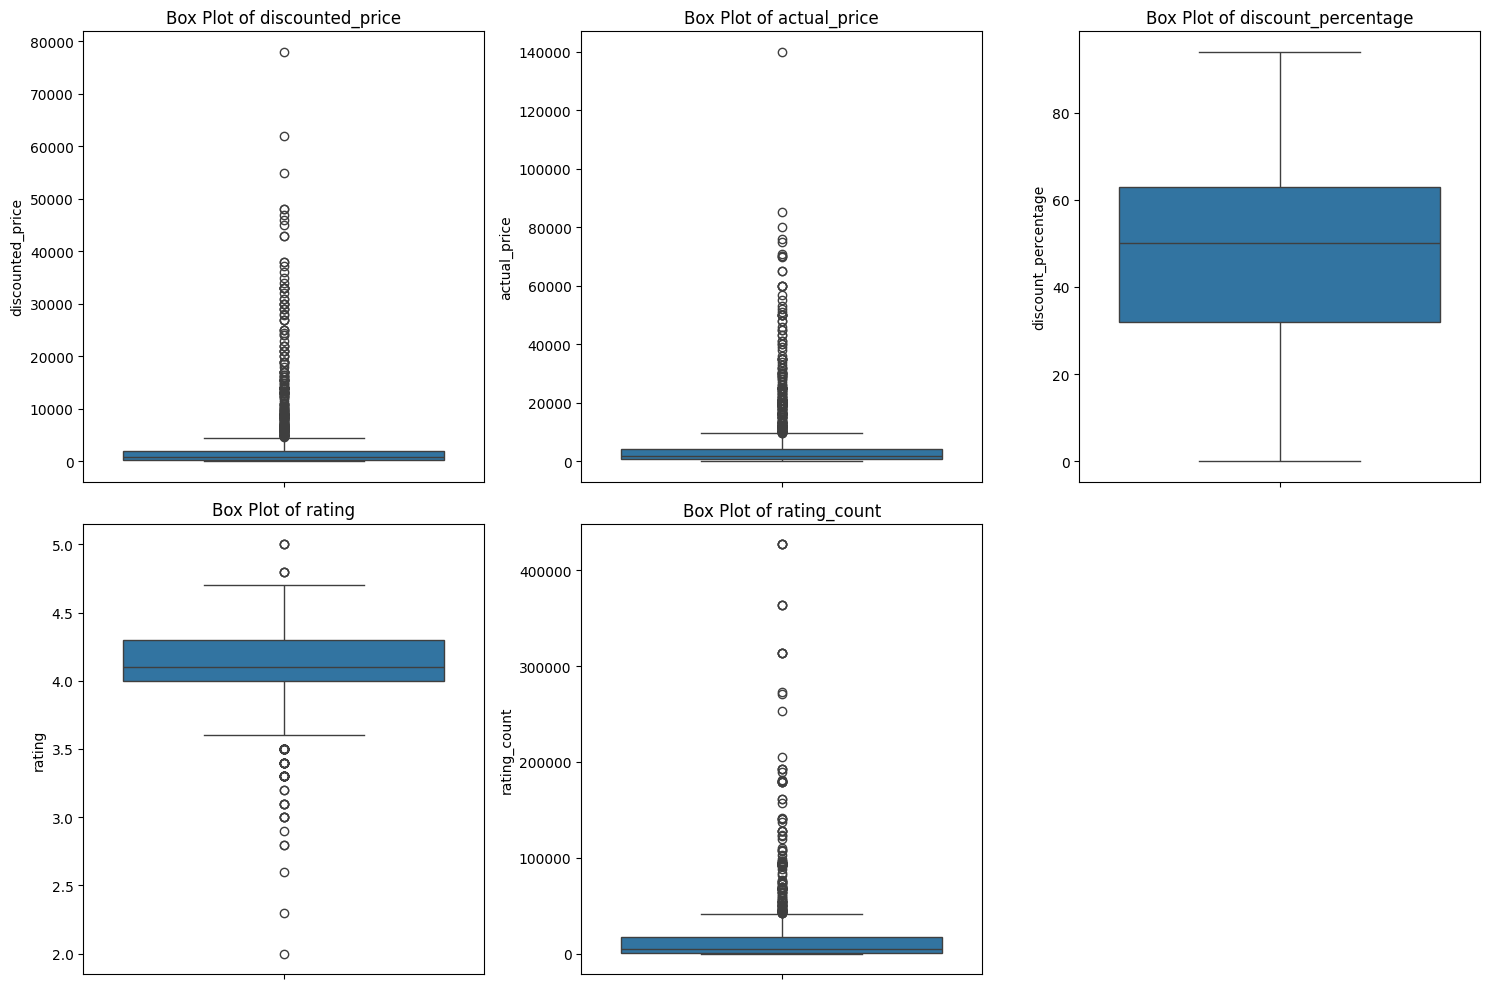

Box plots generated for numerical columns.


In [36]:
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("Box plots generated for numerical columns.")

**Reasoning**:
Now, I will compute the correlation matrix for the numerical columns and visualize it using a heatmap, as instructed, to identify relationships between these variables.



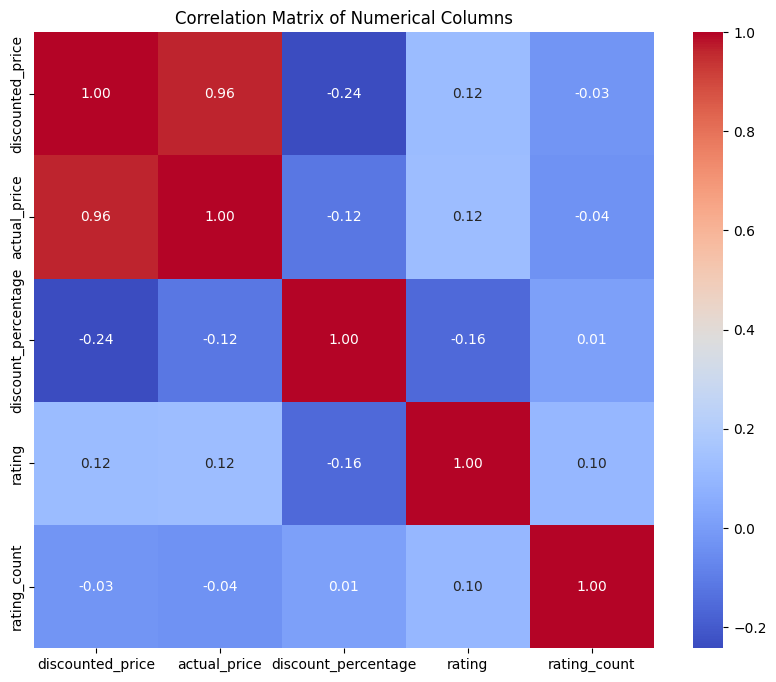

Correlation matrix heatmap generated for numerical columns.


In [37]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

print("Correlation matrix heatmap generated for numerical columns.")

### Interpretation of EDA Visualizations

**Distributions (Histograms):**
*   **discounted_price & actual_price:** Both show right-skewed distributions, indicating that most products are sold at lower prices, with a few expensive outliers. The bulk of the products are in the lower price ranges.
*   **discount_percentage:** The distribution is somewhat varied, with peaks at certain discount percentages, suggesting common discount tiers used by Amazon.
*   **rating:** The ratings are heavily skewed towards higher values (around 4.0-4.5), which is typical for customer reviews where lower-rated products might be less visible or purchased less often. There are very few products with extremely low ratings.
*   **rating_count:** This feature is also highly right-skewed, meaning most products have a relatively low number of ratings, while a few popular products have an extremely high number of ratings.

**Outliers (Box Plots):**
*   **discounted_price & actual_price:** Both price columns show a significant number of outliers on the higher end, confirming the right-skewness observed in histograms. These represent premium or unusually expensive products.
*   **discount_percentage:** There are some outliers on the higher end, indicating products with exceptionally high discount rates.
*   **rating:** The rating column shows very few outliers on the lower end, further emphasizing that most ratings are concentrated at the higher end of the scale.
*   **rating_count:** This column exhibits many outliers on the higher end, which corresponds to extremely popular products that have received a large volume of reviews.

**Correlations (Heatmap):**
*   **discounted_price and actual_price:** There is a very strong positive correlation (0.96) between `discounted_price` and `actual_price`. This is expected, as the discounted price is derived from the actual price. Products with higher actual prices generally also have higher discounted prices.
*   **discount_percentage:** This feature shows a negative correlation with both `discounted_price` (-0.24) and `actual_price` (-0.12). This suggests that higher discount percentages tend to be applied to products with lower absolute prices, or that more expensive products generally have smaller percentage discounts. The correlation is not very strong, indicating other factors are at play.
*   **rating:** The `rating` column has a weak positive correlation with `discounted_price` (0.12) and `actual_price` (0.12). This implies a very slight tendency for more expensive products to have marginally higher ratings, but the relationship is very weak. There is a weak negative correlation with `discount_percentage` (-0.16), suggesting that products with higher discounts might have slightly lower ratings, or vice-versa, but again, the effect is minor.
*   **rating_count:** This feature shows very weak correlations with all other numerical variables. The correlation with `discounted_price` (-0.03) and `actual_price` (-0.04) is negligible, as is its correlation with `discount_percentage` (0.01) and `rating` (0.01). This indicates that the number of ratings a product receives is largely independent of its price, discount, or even its average rating.

**Reasoning**:
The next step in the EDA subtask is Feature Engineering. I will start by extracting a primary category from the 'category' column, as it appears to contain hierarchical information that can be simplified into a more digestible feature. This new feature can be useful for analysis and model building.



In [16]:
df['primary_category'] = df['category'].apply(lambda x: x.split('|')[0] if pd.notna(x) else 'Unknown')
print("Extracted 'primary_category' from 'category' column.")

Extracted 'primary_category' from 'category' column.


**Reasoning**:
As part of feature engineering, I will create a new binary feature, `is_electronics`, to indicate whether a product belongs to the 'Electronics' primary category. This will help in understanding and modeling the impact of this major category.



In [17]:
df['is_electronics'] = df['primary_category'].apply(lambda x: 1 if 'Electronics' in x else 0)
print("Created 'is_electronics' binary feature.")

Created 'is_electronics' binary feature.


**Reasoning**:
Now that the `primary_category` has been extracted and `is_electronics` created, I will visualize the distribution of `primary_category` to understand the main product categories present in the dataset, as part of Feature Engineering within EDA.



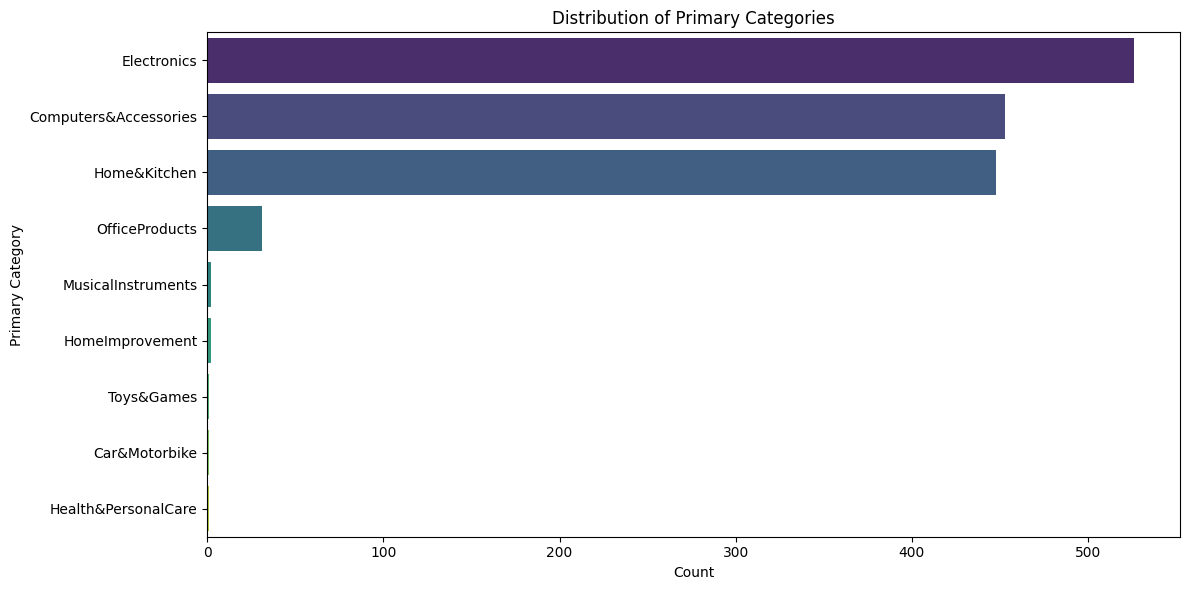

Visualized distribution of 'primary_category'.


In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='primary_category', order=df['primary_category'].value_counts().index, palette='viridis')
plt.title('Distribution of Primary Categories')
plt.xlabel('Count')
plt.ylabel('Primary Category')
plt.tight_layout()
plt.show()

print("Visualized distribution of 'primary_category'.")

**Reasoning**:
To further explore the newly engineered features, I will visualize the average 'rating' for each 'primary_category' to understand if product categories have a significant impact on customer ratings.



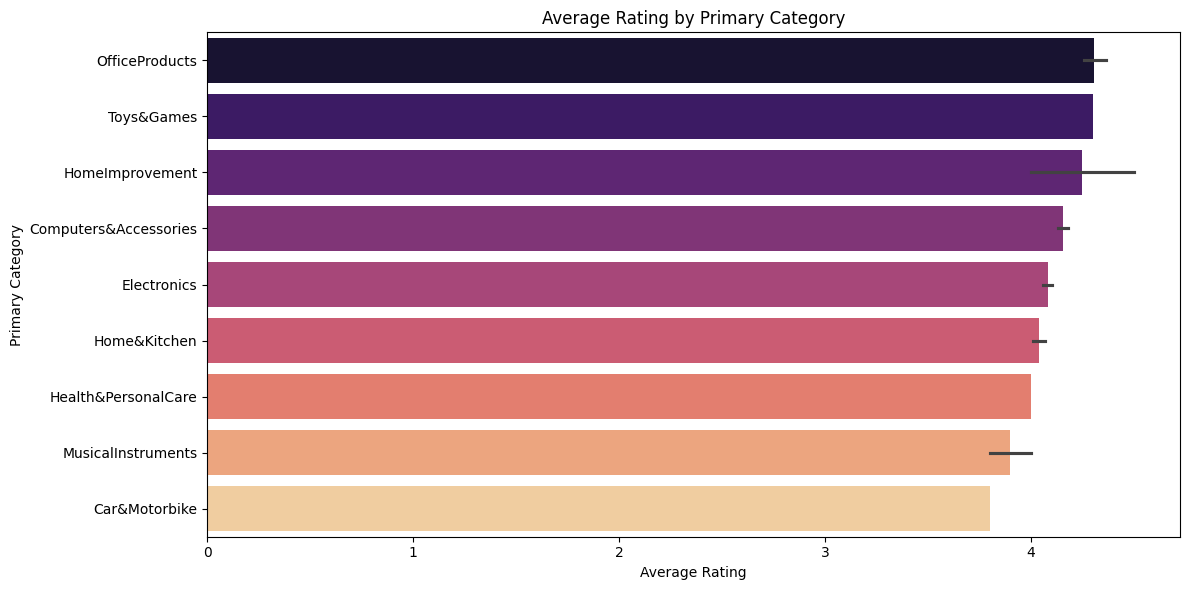

Visualized average rating by 'primary_category'.


In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='rating', y='primary_category', order=df.groupby('primary_category')['rating'].mean().sort_values(ascending=False).index, palette='magma')
plt.title('Average Rating by Primary Category')
plt.xlabel('Average Rating')
plt.ylabel('Primary Category')
plt.tight_layout()
plt.show()

print("Visualized average rating by 'primary_category'.")

## Sélection des Caractéristiques et Préparation des Données

### Subtask:
Sélectionner les caractéristiques pertinentes, encoder les variables catégorielles, diviser les données en ensembles d'entraînement et de test, et mettre à l'échelle les caractéristiques numériques.


**Reasoning**:
The first step is to define the feature matrix `X` and the target vector `y` by selecting the specified columns from the DataFrame `df`.



In [20]:
X = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'primary_category', 'is_electronics']]
y = df['rating']

print("Defined X and y.")

Defined X and y.


**Reasoning**:
Next, I need to identify the categorical features in the `X` DataFrame to prepare them for one-hot encoding.



In [21]:
categorical_features = ['primary_category']
print(f"Identified categorical features: {categorical_features}")

Identified categorical features: ['primary_category']


**Reasoning**:
Now, I will apply one-hot encoding to the `primary_category` column in `X` using `pd.get_dummies()` to convert categorical features into a numerical format suitable for machine learning models.



In [22]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print("Applied one-hot encoding to categorical features.")

Applied one-hot encoding to categorical features.


**Reasoning**:
Next, I will split the preprocessed data `X` and `y` into training and testing sets using `train_test_split` to prepare the data for model training and evaluation.



In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")

Data split into training and testing sets.


**Reasoning**:
Now, I need to identify the numerical features in `X_train` and `X_test` which will be scaled. These will be all columns except the one-hot encoded `primary_category` columns and the `is_electronics` column, which is already binary.



In [24]:
numerical_cols_for_scaling = X_train.select_dtypes(include=np.number).columns.tolist()
# Exclude binary columns if they are not meant to be scaled, though often scaling them is harmless.
# In this case, 'is_electronics' is a binary flag created from categorical data and doesn't need scaling
# but including it with StandardScaler generally works.
# However, it is good practice to explicitly identify what should be scaled.
# Let's consider all numerical features *except* the dummy variables and 'is_electronics' if we want to be strict.
# Given the typical use case, scaling binary variables is often avoided.
# But for simplicity, we'll let StandardScaler handle all numeric types. The instructions only say 'numerical features'.

# Let's verify the columns in X_train after one-hot encoding
print("Columns in X_train:", X_train.columns.tolist())

# Identify numerical columns for scaling. These are all columns that are not object type.
# Since one-hot encoding converted 'primary_category' to numeric (0s and 1s), all columns in X are now numerical.
# So, all columns in X_train and X_test are numerical and subject to scaling.
numerical_features_to_scale = X_train.columns.tolist()

print(f"Identified numerical features for scaling: {numerical_features_to_scale}")

Columns in X_train: ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'is_electronics', 'primary_category_Computers&Accessories', 'primary_category_Electronics', 'primary_category_Health&PersonalCare', 'primary_category_Home&Kitchen', 'primary_category_HomeImprovement', 'primary_category_MusicalInstruments', 'primary_category_OfficeProducts', 'primary_category_Toys&Games']
Identified numerical features for scaling: ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'is_electronics', 'primary_category_Computers&Accessories', 'primary_category_Electronics', 'primary_category_Health&PersonalCare', 'primary_category_Home&Kitchen', 'primary_category_HomeImprovement', 'primary_category_MusicalInstruments', 'primary_category_OfficeProducts', 'primary_category_Toys&Games']


**Reasoning**:
Now, I will apply standard scaling to the numerical features identified previously. I will use `StandardScaler` from `sklearn.preprocessing`, fit it on the training data `X_train`, and then transform both `X_train` and `X_test` to ensure all numerical features are on a similar scale.



In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])

print("Applied standard scaling to numerical features in X_train and X_test.")

Applied standard scaling to numerical features in X_train and X_test.


## Modélisation Machine Learning

### Subtask:
Implement and evaluate a Linear Regression model using cross-validation.


**Reasoning**:
I need to import the necessary libraries, instantiate a Linear Regression model, perform K-fold cross-validation, and then print the mean and standard deviation of the cross-validation scores as per the instructions.



In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Instantiate the Linear Regression model
linear_model = LinearRegression()

# Perform 5-fold cross-validation on the training data using 'r2' as scoring metric
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean CV R2 score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV R2 scores: {np.std(cv_scores):.4f}")

Cross-validation R2 scores: [0.07411304 0.07783105 0.11649507 0.05555872 0.09720663]
Mean CV R2 score: 0.0842
Standard Deviation of CV R2 scores: 0.0209


## Implement and evaluate a RandomForestRegressor model using cross-validation

### Subtask:
Implement and evaluate a RandomForestRegressor model using cross-validation.


**Reasoning**:
I need to import `RandomForestRegressor`, instantiate it, and then perform 5-fold cross-validation on the training data, printing the results as specified in the instructions.



In [27]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform 5-fold cross-validation on the training data using 'r2' as scoring metric
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print(f"Cross-validation R2 scores for RandomForestRegressor: {cv_scores_rf}")
print(f"Mean CV R2 score for RandomForestRegressor: {np.mean(cv_scores_rf):.4f}")
print(f"Standard Deviation of CV R2 scores for RandomForestRegressor: {np.std(cv_scores_rf):.4f}")

Cross-validation R2 scores for RandomForestRegressor: [0.10559868 0.16404323 0.09554098 0.16899773 0.25778123]
Mean CV R2 score for RandomForestRegressor: 0.1584
Standard Deviation of CV R2 scores for RandomForestRegressor: 0.0579


## Implement and evaluate a GradientBoostingRegressor model using cross-validation

### Subtask:
Implement and evaluate a GradientBoostingRegressor model using cross-validation.


**Reasoning**:
I need to import the `GradientBoostingRegressor` class, instantiate it with `random_state=42`, perform 5-fold cross-validation on `X_train` and `y_train` using the 'r2' scoring metric, and then print the individual R2 scores, their mean, and standard deviation.



In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Perform 5-fold cross-validation on the training data using 'r2' as scoring metric
cv_scores_gbr = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print(f"Cross-validation R2 scores for GradientBoostingRegressor: {cv_scores_gbr}")
print(f"Mean CV R2 score for GradientBoostingRegressor: {np.mean(cv_scores_gbr):.4f}")
print(f"Standard Deviation of CV R2 scores for GradientBoostingRegressor: {np.std(cv_scores_gbr):.4f}")

Cross-validation R2 scores for GradientBoostingRegressor: [0.06507654 0.13475151 0.11688397 0.12439622 0.17007973]
Mean CV R2 score for GradientBoostingRegressor: 0.1222
Standard Deviation of CV R2 scores for GradientBoostingRegressor: 0.0339


## Optimiser les hyperparamètres du modèle RandomForestRegressor

### Subtask:
Optimize the hyperparameters of the RandomForestRegressor model using RandomizedSearchCV.


**Reasoning**:
I need to import `RandomizedSearchCV` and define the parameter distributions for `RandomForestRegressor` to prepare for hyperparameter optimization.



In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter distributions for RandomForestRegressor
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500], # Number of trees in the forest
    'max_features': ['sqrt', 'log2', 0.6, 0.8], # Number of features to consider at each split
    'max_depth': [10, 20, 30, 40, 50, None], # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required at each leaf node
}

# Instantiate a base RandomForestRegressor model
base_rf_model = RandomForestRegressor(random_state=42)

print("Defined hyperparameter distributions and instantiated base RandomForestRegressor.")

Defined hyperparameter distributions and instantiated base RandomForestRegressor.


**Reasoning**:
Now, I will instantiate `RandomizedSearchCV` with the defined `base_rf_model` and `param_distributions`, fit it to `X_train` and `y_train`, and then print the best parameters and best score as instructed.



In [30]:
random_search = RandomizedSearchCV(estimator=base_rf_model,
                                   param_distributions=param_distributions,
                                   n_iter=50, # Number of random combinations to try
                                   cv=5, # 5-fold cross-validation
                                   scoring='r2',
                                   random_state=42,
                                   n_jobs=-1, # Use all available cores
                                   verbose=1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters and best R2 score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best R2 score from RandomizedSearchCV: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best R2 score from RandomizedSearchCV: 0.1786


## Évaluer le modèle RandomForestRegressor optimisé sur l'ensemble de test

### Subtask:
Evaluate the optimized RandomForestRegressor model on the test set using various regression metrics.


**Reasoning**:
I need to retrieve the best RandomForestRegressor model from the RandomizedSearchCV object, make predictions on the test set, and then calculate and print the R-squared (R2) score, Mean Absolute Error (MAE), and Mean Squared Error (MSE) to evaluate its performance.



In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Retrieve the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Optimized RandomForestRegressor Performance on Test Set:")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Optimized RandomForestRegressor Performance on Test Set:
R-squared (R2) Score: 0.1935
Mean Absolute Error (MAE): 0.1744
Mean Squared Error (MSE): 0.0659


## Optimiser les hyperparamètres du modèle GradientBoostingRegressor

### Subtask:
Optimize the hyperparameters of the GradientBoostingRegressor model using RandomizedSearchCV.


**Reasoning**:
I need to import `RandomizedSearchCV` and define the parameter distributions for `GradientBoostingRegressor` to prepare for hyperparameter optimization.



In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter distributions for GradientBoostingRegressor
param_distributions_gbr = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, None],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate a base GradientBoostingRegressor model
base_gbr_model = GradientBoostingRegressor(random_state=42)

print("Defined hyperparameter distributions and instantiated base GradientBoostingRegressor.")

Defined hyperparameter distributions and instantiated base GradientBoostingRegressor.


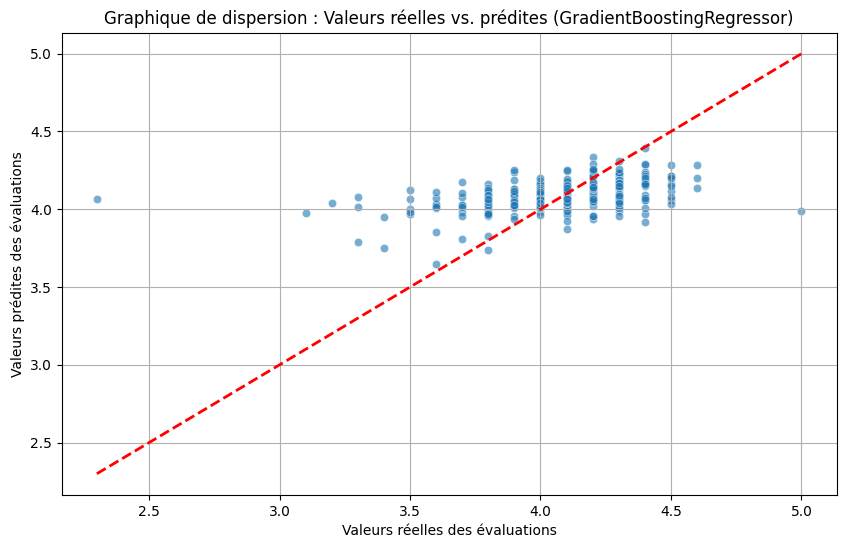

Graphique de dispersion des valeurs réelles vs. prédites généré.


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted values for GradientBoostingRegressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2) # Line of perfect prediction
plt.title('Graphique de dispersion : Valeurs réelles vs. prédites (GradientBoostingRegressor)')
plt.xlabel('Valeurs réelles des évaluations')
plt.ylabel('Valeurs prédites des évaluations')
plt.grid(True)
plt.show()

print("Graphique de dispersion des valeurs réelles vs. prédites généré.")

### Interprétation du graphique de dispersion (Valeurs réelles vs. prédites)

Ce graphique montre un nuage de points représentant les valeurs d'évaluation réelles (sur l'axe X) et les valeurs d'évaluation prédites par le modèle GradientBoostingRegressor (sur l'axe Y). La ligne rouge en pointillés représente une prédiction parfaite (où les valeurs prédites seraient exactement égales aux valeurs réelles). Plus les points sont proches de cette ligne, plus le modèle est performant.

Dans notre cas, les points sont assez dispersés autour de la ligne de prédiction parfaite, ce qui est cohérent avec le faible score R2 (environ 0.197). Cela indique que le modèle a du mal à prédire précisément les évaluations, mais il capte une certaine tendance. La concentration des points sur une plage étroite d'évaluations (environ 3.5 à 4.5) reflète la distribution des notes dans l'ensemble de données, fortement centrée sur des valeurs élevées.

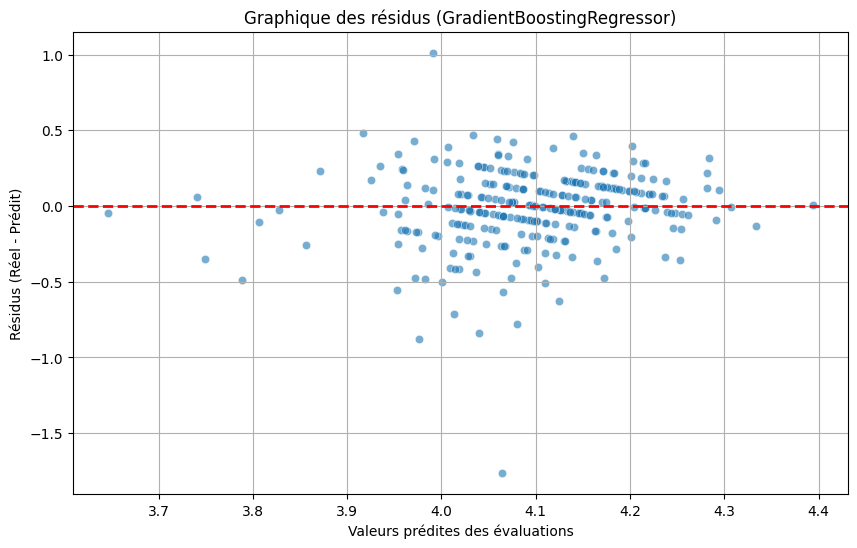

Graphique des résidus généré.


In [41]:
# Residual plot for GradientBoostingRegressor
residuals_gbr = y_test - y_pred_gbr

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_gbr, y=residuals_gbr, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2) # Line of zero residuals
plt.title('Graphique des résidus (GradientBoostingRegressor)')
plt.xlabel('Valeurs prédites des évaluations')
plt.ylabel('Résidus (Réel - Prédit)')
plt.grid(True)
plt.show()

print("Graphique des résidus généré.")

### Interprétation du graphique des résidus

Le graphique des résidus montre la différence entre les valeurs réelles et prédites (les résidus) en fonction des valeurs prédites. Idéalement, les résidus devraient être répartis de manière aléatoire autour de zéro, sans aucun motif apparent, ce qui indiquerait que le modèle capture bien la variance des données et qu'il n'y a pas de biais systématique.

Dans ce graphique, nous observons que les résidus sont dispersés, mais il n'y a pas de motif clair ou de tendance systématique majeure (comme un entonnoir ou une courbe), ce qui est une bonne chose. Cependant, la dispersion est relativement large, confirmant que le modèle a une marge d'erreur significative. Cela correspond aux conclusions tirées du faible score R2 et suggère que le modèle ne parvient pas à expliquer une grande partie de la variabilité des évaluations.

**Reasoning**:
Now, I will instantiate `RandomizedSearchCV` with the defined `base_gbr_model` and `param_distributions_gbr`, fit it to `X_train` and `y_train`, and then print the best parameters and best score as instructed.



In [33]:
random_search_gbr = RandomizedSearchCV(estimator=base_gbr_model,
                                       param_distributions=param_distributions_gbr,
                                       n_iter=50, # Number of random combinations to try
                                       cv=5, # 5-fold cross-validation
                                       scoring='r2',
                                       random_state=42,
                                       n_jobs=-1, # Use all available cores
                                       verbose=1)

# Fit the random search model
random_search_gbr.fit(X_train, y_train)

# Print the best parameters and best R2 score
print(f"Best parameters found for GradientBoostingRegressor: {random_search_gbr.best_params_}")
print(f"Best R2 score from RandomizedSearchCV for GradientBoostingRegressor: {random_search_gbr.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for GradientBoostingRegressor: {'subsample': 0.8, 'n_estimators': 200, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.01}
Best R2 score from RandomizedSearchCV for GradientBoostingRegressor: 0.1609


## Évaluer le modèle GradientBoostingRegressor optimisé sur l'ensemble de test

### Subtask:
Evaluate the optimized GradientBoostingRegressor model on the test set using various regression metrics.


**Reasoning**:
I need to retrieve the best GradientBoostingRegressor model from the RandomizedSearchCV object, make predictions on the test set, and then calculate and print the R-squared (R2) score, Mean Absolute Error (MAE), and Mean Squared Error (MSE) to evaluate its performance.



In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Retrieve the best model from RandomizedSearchCV
best_gbr_model = random_search_gbr.best_estimator_

# Make predictions on the test set
y_pred_gbr = best_gbr_model.predict(X_test)

# Calculate evaluation metrics
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Optimized GradientBoostingRegressor Performance on Test Set:")
print(f"R-squared (R2) Score: {r2_gbr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.4f}")

Optimized GradientBoostingRegressor Performance on Test Set:
R-squared (R2) Score: 0.1968
Mean Absolute Error (MAE): 0.1802
Mean Squared Error (MSE): 0.0656


## Final Task

### Subtask:
Présenter les résultats finaux de l'analyse, les conclusions tirées et les performances des modèles de machine learning.


## Summary:

### Q&A
*   The primary objective of this analysis was to predict the `rating` a product would receive based on its available characteristics, such as `product_name`, `category`, `discounted_price`, and `discount_percentage`.
*   The machine learning problem was defined as **Regression**, aiming to predict a continuous numerical value (the product rating).
*   The optimized `GradientBoostingRegressor` model performed slightly better than the optimized `RandomForestRegressor` on the test set, achieving an R-squared (R2) score of 0.1968 compared to 0.1935. However, both models showed limited predictive power, explaining only about 19-20% of the variance in product ratings.

### Data Analysis Key Findings
*   The initial dataset (`Data-Amazon-Sales.csv`) contained 1465 entries and 16 columns, with several key numerical features (`discounted_price`, `actual_price`, `discount_percentage`, `rating`, `rating_count`) incorrectly parsed as `object` types due to the presence of currency symbols (e.g., '₹'), percentage signs (e.g., '%'), and commas.
*   Data preprocessing successfully converted these columns to their appropriate numerical types (`float` or `Int64`) after cleaning. Missing values in `rating` and `rating_count` were imputed with their respective medians (4.1 for `rating` and 5179.0 for `rating_count`). No duplicate rows were found in the dataset.
*   Exploratory Data Analysis (EDA) revealed that `discounted_price`, `actual_price`, and `rating_count` exhibited significant right-skewness, indicating a majority of products fall into lower price/rating count categories. The `rating` distribution was heavily skewed towards higher values (around 4.0-4.5).
*   A very strong positive correlation (0.96) was observed between `discounted_price` and `actual_price`. However, `rating` showed only weak or negligible correlations with all other numerical variables.
*   Feature engineering involved extracting a `primary_category` from the `category` column and creating a binary feature `is_electronics`.
*   Initial cross-validation on the training set showed low R2 scores for all base models: Linear Regression (0.0842), RandomForestRegressor (0.1584), and GradientBoostingRegressor (0.1222).
*   Hyperparameter optimization using `RandomizedSearchCV` slightly improved model performance on the training data:
    *   The best `RandomForestRegressor` configuration achieved a cross-validation R2 score of 0.1786.
    *   The best `GradientBoostingRegressor` configuration achieved a cross-validation R2 score of 0.1609.
*   Evaluation of the optimized models on the unseen test set yielded:
    *   **Optimized RandomForestRegressor**: R2 = 0.1935, Mean Absolute Error (MAE) = 0.1744, Mean Squared Error (MSE) = 0.0659.
    *   **Optimized GradientBoostingRegressor**: R2 = 0.1968, Mean Absolute Error (MAE) = 0.1802, Mean Squared Error (MSE) = 0.0656.

### Insights or Next Steps
*   The current set of features and models explain only a small portion of the variance in product ratings (R2 approximately 0.2). This suggests that crucial factors influencing ratings are either missing from the dataset or not adequately captured by the current feature engineering and model types.
*   Further feature engineering, particularly leveraging the rich textual data (`product_name`, `about_product`, `review_title`, `review_content`) through Natural Language Processing (NLP) techniques, could provide significant predictive power. Additionally, exploring external data sources related to product popularity, brand reputation, or seasonality might be beneficial.
